In [56]:
#Import libaries to manipulate data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [57]:
#upload data on a dataframe and rename columns(optional)
bd = pd.read_csv('annual-sheep-population.csv', delimiter=";")
bd.columns=['year', 'Count']

#print out the size in order to know how to split test and train dataset
bd.size

152

In [58]:
#split the dataset into test and train variables
train = bd[0:15]
test = bd[15:30]

train.size

30

In [59]:
#Clean up the dataset by dropping out NaN values
test_c = test.dropna()
train_c = train.dropna()

In [60]:
#Here I have converted year column in order to have a type to work with on python
train.year = pd.DatetimeIndex(train.year)

#This is an optional action because for me is important to set the time feature as index
train.index = pd.PeriodIndex(train.year, freq='M')

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [61]:
#sort out by date
train_v = train.sort_values(by="year")

#print out the dataset head
train_v.head()

,year,Count
year,,
1867-01,1867-01-01,2203.0
1868-01,1868-01-01,2360.0
1869-01,1869-01-01,2254.0
1870-01,1870-01-01,2165.0
1871-01,1871-01-01,2024.0


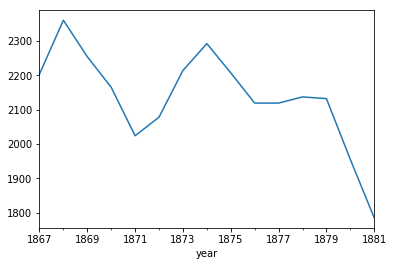

In [63]:
#Let's plot out the count feature over the time
train_v.Count.plot()

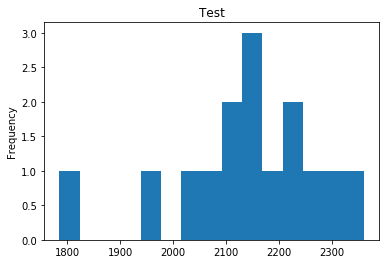

In [64]:
#Here's another way to describe your dataset. The histogram is useful to understand the recurrent values
train_v.Count.plot(kind="hist", bins=15, title = "Test")

In [65]:
#first model: Mean model
mean_model = train_v.Count.mean()

#let's store this as prediction value
train_v['PredictionMean'] = mean_model
train_v.head()

,year,Count,PredictionMean
year,,,
1867-01,1867-01-01,2203.0,2136.266667
1868-01,1868-01-01,2360.0,2136.266667
1869-01,1869-01-01,2254.0,2136.266667
1870-01,1870-01-01,2165.0,2136.266667
1871-01,1871-01-01,2024.0,2136.266667


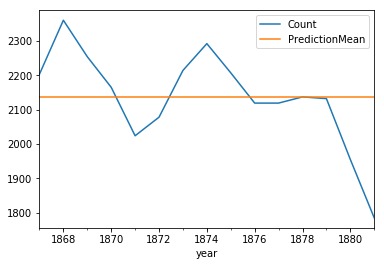

In [66]:
#Let's plot out the Prediction mean values over the true values
train_v.plot(kind="line", x = "year", y = ["Count","PredictionMean"])

In [67]:
#Calculate root mean squared error
#Calculate error values

def RMSE(pred, real):
    mse = (pred - real)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [68]:
#Let's call RMSE() and let's calulate the RMSE of prediction mean model
RMSE_mean_model = RMSE(train_v.PredictionMean, train_v.Count)
RMSE_mean_model

135.97914872835796

In [69]:
#It is pretty interesting to create a dataframe in order to stock models evaluation
new_model_columns = ['Model', 'Forecast','RMSE']
new_model_df = pd.DataFrame(columns = new_model_columns)
new_model_df.head()

,Model,Forecast,RMSE


In [70]:
#Let's feed up the dataframe with prediction mean scoring
new_model_df.loc[0, 'Model'] = 'Mean'
new_model_df.loc[0, 'Forecast'] = mean_model
new_model_df.loc[0, 'RMSE'] = RMSE_mean_model

new_model_df.head()

,Model,Forecast,RMSE
0,Mean,2136.27,135.979


In [71]:
train_v.head()

,year,Count,PredictionMean
year,,,
1867-01,1867-01-01,2203.0,2136.266667
1868-01,1868-01-01,2360.0,2136.266667
1869-01,1869-01-01,2254.0,2136.266667
1870-01,1870-01-01,2165.0,2136.266667
1871-01,1871-01-01,2024.0,2136.266667


In [72]:
train_v.year.min()

Timestamp('1867-01-01 00:00:00')

In [73]:
#The year index will allow us to visualize two different models by using an index as a result of the difference between Year and the minimum year
train_v['YearIndex'] = train_v.year - train_v.year.min()
train_v.dtypes

year               datetime64[ns]
Count                     float64
PredictionMean            float64
YearIndex         timedelta64[ns]
dtype: object

In [74]:
#Here we transform the YearIndex values in order to have the delta
train_v['YearIndex'] = train_v['YearIndex']/np.timedelta64(1, 'M')

In [75]:
train_v.head()

,year,Count,PredictionMean,YearIndex
year,,,,
1867-01,1867-01-01,2203.0,2136.266667,0.000000
1868-01,1868-01-01,2360.0,2136.266667,11.992033
1869-01,1869-01-01,2254.0,2136.266667,24.016920
1870-01,1870-01-01,2165.0,2136.266667,36.008953
1871-01,1871-01-01,2024.0,2136.266667,48.000986


In [76]:
#plotting linear regression count and YearIndex
LR_model = smf.ols('Count ~ YearIndex', data = train_v).fit()

#Let's have a look on OLS linear regression results
LR_model.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     9.453
Date:                Fri, 14 Dec 2018   Prob (F-statistic):            0.00887
Time:                        14:14:41   Log-Likelihood:                -90.873
No. Observations:                  15   AIC:                             185.7
Df Residuals:                      13   BIC:                             187.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2279.2198     54.639     41.715      0.000    2161.180    2397.259
YearIndex     -1.7017      0.553     -3.075      0.009      -2.897      -0.506
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.040
Skew:                          -0.522   Prob(JB):                        0.594
Kurtosis:                       2.242   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#Print out the linear regression parameters
LR_model.params

Intercept    2279.219782
YearIndex      -1.701710
dtype: float64

In [78]:
#Let's stock both parameters on new variables in order to use them later to calculate the model forecasting
m = LR_model.params[0]
c = LR_model.params[1]

In [79]:
#Let's get an overview over the predictions we have
LR_model_pred = LR_model.predict()
LR_model_pred

array([2279.21978177, 2258.81281738, 2238.3499435 , 2217.94297911,
       2197.53601473, 2177.12905034, 2156.66617646, 2136.25921207,
       2115.85224768, 2095.44528329, 2074.98240941, 2054.57544502,
       2034.16848063, 2013.76151624, 1993.29864236])

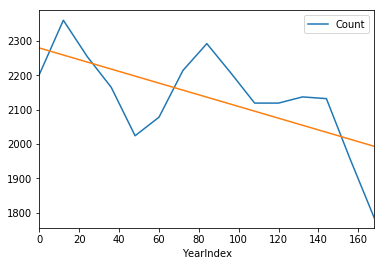

In [80]:
#Plotting out the reality and our predictions is interesting because this would allow us to understand how our model is performing
train_v.plot(kind='line', x = 'YearIndex', y = 'Count')
plt.plot(train_v.YearIndex, LR_model_pred, '-')

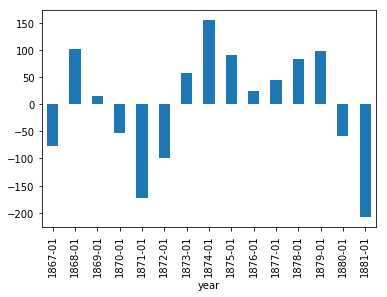

In [81]:
#The residual plot is very interesting in order to measure a linear regression model performance
LR_model.resid.plot(kind='bar')

In [82]:
#We create a new column in our train dataset and feed it up with the linear regression values
train_v['LinearCount'] = LR_model_pred
train_v.head()

,year,Count,PredictionMean,YearIndex,LinearCount
year,,,,,
1867-01,1867-01-01,2203.0,2136.266667,0.000000,2279.219782
1868-01,1868-01-01,2360.0,2136.266667,11.992033,2258.812817
1869-01,1869-01-01,2254.0,2136.266667,24.016920,2238.349944
1870-01,1870-01-01,2165.0,2136.266667,36.008953,2217.942979
1871-01,1871-01-01,2024.0,2136.266667,48.000986,2197.536015


In [83]:
#as we did earlier we must to apply RMSE() function to have the linear regression model scoring
RMSE_LR = RMSE(train_v.LinearCount, train_v.Count)
RMSE_LR

103.46857851580641

In [84]:
#Now we can use the linear regression model parameters we stocked previously in order to have the forecast
forecast_LR_model_pred = m * 15 + c

In [85]:
#Finally we update the dataframe with the linear regression model results
new_model_df.loc[1, 'Model'] = 'LR'
new_model_df.loc[1, 'Forecast'] = forecast_LR_model_pred
new_model_df.loc[1, 'RMSE'] = RMSE_LR

new_model_df.head()

,Model,Forecast,RMSE
0,Mean,2136.27,135.979
1,LR,34186.6,103.469
